In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

DJ: 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

Jessica: 2. How does direction of travel, route, or location affect the headway and on-time performance?

Haylie: 3. How does time of day or day of week affect headway and on-time performance?

Abraham: 4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

Griffin: 5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [4]:
wego.loc[wego['OPERATOR'].isna()]
#check to see if there are NaN values in 'OPERATOR' column

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES


In [5]:
driver = wego.drop(columns = ['SERVICE_ABBR','ADHERENCE_ID','BLOCK_ABBR','OVERLOAD_ID'])
driver
#drop columns that aren't necessary for the question for cleaner df

,CALENDAR_ID,DATE,ROUTE_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,2023-08-01,22,1040,345104,TO DOWNTOWN,MHSP,14.0,1,36.181248,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,2023-08-01,22,1040,345104,TO DOWNTOWN,ELIZ,10.0,0,36.193454,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,2023-08-01,22,1040,345104,TO DOWNTOWN,CV23,5.0,0,36.182177,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,2023-08-01,22,1040,345104,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,2023-08-01,22,1040,345105,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2023-09-30,7,2312,353448,TO DOWNTOWN,21BK,4.0,0,36.138372,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2023-09-30,7,2312,353448,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2023-09-30,7,2312,353449,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2023-09-30,7,2312,353449,FROM DOWNTOWN,21BK,4.0,0,36.138881,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [6]:
driver_early_late_ontime_count = driver.groupby('OPERATOR').agg({'ADJUSTED_EARLY_COUNT': 'sum','ADJUSTED_LATE_COUNT': 'sum','ADJUSTED_ONTIME_COUNT': 'sum'})
driver_early_late_ontime_count
#group by operator according to their early, late, and on time quantities

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
OPERATOR,,,
0,0,0,1
56,0,0,3
235,1,5,6
244,0,5,20
301,1,17,19
...,...,...,...
3149,4,8,76
3156,0,71,219
3165,0,20,12


In [7]:
top_fifteen_most_ontime_drivers = driver_early_late_ontime_count.nlargest(15, 'ADJUSTED_ONTIME_COUNT').reset_index()
top_fifteen_most_ontime_drivers
#filter for top fifteen on time drivers

,OPERATOR,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,1266,75,268,2522
1,1133,13,107,2505
2,1147,159,88,2439
3,1927,38,58,2317
4,409,9,61,2310
5,1762,16,23,2294
6,379,31,56,2172
7,304,3,275,2155
8,2352,216,241,2148
9,2424,46,325,2146


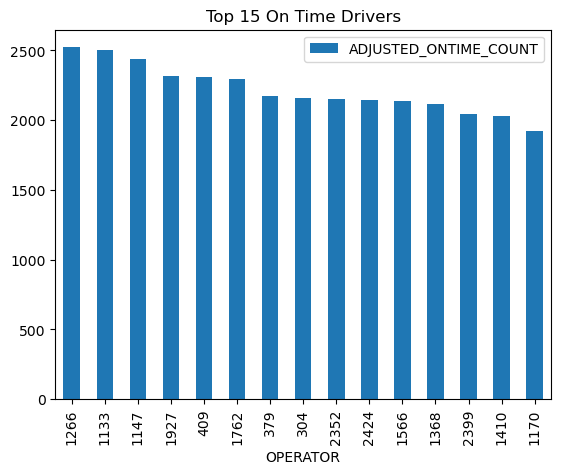

In [8]:
top_fifteen_most_ontime_drivers.plot(kind = 'bar', 
            x = 'OPERATOR', 
            y = 'ADJUSTED_ONTIME_COUNT',
            title = 'Top 15 On Time Drivers');

In [9]:
top_fifteen_latest_drivers = driver_early_late_ontime_count.nlargest(15, 'ADJUSTED_LATE_COUNT').reset_index()
top_fifteen_latest_drivers
#filter for top 15 latest drivers

,OPERATOR,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2109,18,936,1139
1,1800,26,810,789
2,1204,15,767,1336
3,3064,22,750,1113
4,1352,11,728,954
5,2082,7,724,1028
6,2312,16,714,582
7,3101,19,699,579
8,357,35,683,866
9,2783,54,595,706


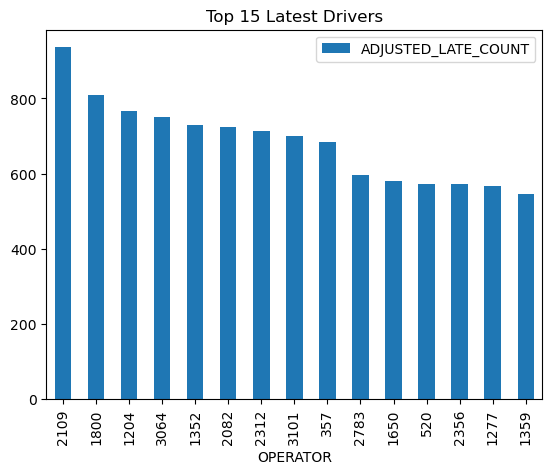

In [10]:
top_fifteen_latest_drivers.plot(kind = 'bar', 
            x = 'OPERATOR', 
            y = 'ADJUSTED_LATE_COUNT',
            title = 'Top 15 Latest Drivers');

In [11]:
top_fifteen_earliest_drivers = driver_early_late_ontime_count.nlargest(15, 'ADJUSTED_EARLY_COUNT').reset_index()
top_fifteen_earliest_drivers
#filter for top 15 earliest drivers

,OPERATOR,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,659,379,44,1492
1,2112,234,136,1199
2,2352,216,241,2148
3,1170,187,13,1923
4,1730,181,20,460
5,1717,178,50,1259
6,1761,178,31,1917
7,1361,162,158,1567
8,2230,161,54,969
9,1147,159,88,2439


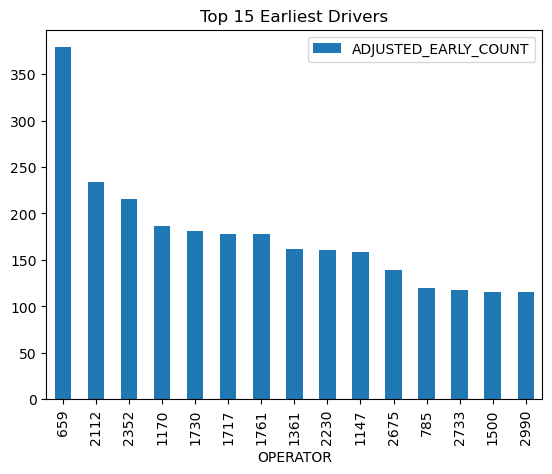

In [12]:
top_fifteen_earliest_drivers.plot(kind = 'bar', 
            x = 'OPERATOR', 
            y = 'ADJUSTED_EARLY_COUNT',
            title = 'Top 15 Earliest Drivers');

**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).


In [13]:
print(wego['SCHEDULED_HDWY'])
#SCHEDULED HDWY column from afar

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
350324    30.0
350325     NaN
350326    30.0
350327    30.0
350328     NaN
Name: SCHEDULED_HDWY, Length: 350329, dtype: float64


In [14]:
wego.loc[wego['ACTUAL_HDWY'].isna()]
#finding NaN values in 'ACTUAL_HDWY' column

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350319,120230930,2,100406605,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350321,120230930,2,100406607,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
350322,120230930,2,100406608,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN


In [15]:
wego.loc[wego['HDWY_DEV'].isna()]
##finding NaN values in 'HDWY_DEV' column

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350319,120230930,2,100406605,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350321,120230930,2,100406607,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
350322,120230930,2,100406608,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN


drill down on drivers and their routes (how frequently they drove on different routes, how long were they driving these routes, did they have more than one route per day?)

In [16]:
operator_by_id = wego['OPERATOR'].unique()
operator_by_id
#figure out how many different drivers there are

array([1040, 2374, 2689, 1617, 2427, 1892, 1190, 1222, 2355, 2125, 2649,
       1761, 1893, 2041, 1170, 1823, 1198, 1147,  522, 2603,  409, 2958,
       2088, 2348, 2706, 1368, 3100, 2529, 1237, 1992, 2059, 2441, 1204,
        326, 2306, 2177,  559, 2963, 1948, 2230, 1703, 2569, 2055, 2675,
       2752,  517, 2586, 2623,  907, 1682, 1619, 1133,  659, 1266, 1623,
       1938, 1410, 1705, 1927, 1391, 2629,  304,  357, 2500, 2112, 1505,
       1904, 2577, 1052, 1800, 2253, 1489, 1542, 2624, 2062,  359, 1582,
       2428,  332, 2967, 3016, 2760, 2584, 1206, 2399, 3124, 2109, 1208,
       3012, 1361, 2990, 1650, 1359,  611, 1590, 2832, 2560,  520, 2371,
       1175, 2200, 1352, 2714, 1500, 2817, 3096, 1958, 2458, 1601, 1343,
       1016, 2217, 1866, 2987, 1372, 2792, 1330, 2733, 1713, 1406, 2780,
        471, 2638, 1780, 1177, 2221, 1743, 3144,  572, 2400,  341, 2312,
        778, 2697,  723, 2324, 2164, 2618, 2563, 2809, 2448, 1762, 1401,
       2352,  414, 2497, 2357, 2545, 3088, 3015, 27

In [17]:
wego['ROUTE_ABBR'].nunique()
#figure out how many routes are in the dataset

8

In [18]:
driver['HDWY_DEVIATION_PCT'] = driver['HDWY_DEV']/driver['SCHEDULED_HDWY']
driver
#calculate headway deviation pct & add column w results

,CALENDAR_ID,DATE,ROUTE_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEVIATION_PCT
0,120230801,2023-08-01,22,1040,345104,TO DOWNTOWN,MHSP,14.0,1,36.181248,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN
1,120230801,2023-08-01,22,1040,345104,TO DOWNTOWN,ELIZ,10.0,0,36.193454,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
2,120230801,2023-08-01,22,1040,345104,TO DOWNTOWN,CV23,5.0,0,36.182177,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
3,120230801,2023-08-01,22,1040,345104,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN
4,120230801,2023-08-01,22,1040,345105,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2023-09-30,7,2312,353448,TO DOWNTOWN,21BK,4.0,0,36.138372,...,5.266666,0,1,0,0,0.0,0,0.000000,NaN,0.175556
350325,120230930,2023-09-30,7,2312,353448,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,...,NaN,0,1,0,0,NaN,0,0.000000,NaN,NaN
350326,120230930,2023-09-30,7,2312,353449,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,...,1.866666,0,0,1,0,0.0,0,0.000000,NaN,0.062222
350327,120230930,2023-09-30,7,2312,353449,FROM DOWNTOWN,21BK,4.0,0,36.138881,...,17.500000,0,1,0,0,0.0,0,0.000000,NaN,0.583333


This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. Bunching occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. Gapping is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [19]:
bunch_gap = driver[(driver['HDWY_DEVIATION_PCT']>=0.5) & (driver['HDWY_DEVIATION_PCT']<=1.5)]
bunch_gap

,CALENDAR_ID,DATE,ROUTE_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEVIATION_PCT
232,120230801,2023-08-01,22,1190,345300,TO DOWNTOWN,MHSP,14.0,1,36.181248,...,44.166666,0,0,1,0,0.0,0,16.283333,19.0,0.883333
235,120230801,2023-08-01,22,1190,345301,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,...,7.333333,0,1,0,0,0.0,0,20.466666,10.0,0.611111
240,120230801,2023-08-01,22,1190,345302,TO DOWNTOWN,YGKG,7.0,1,36.203239,...,51.383333,0,0,1,1,1.0,0,0.000000,NaN,1.048639
249,120230801,2023-08-01,22,1190,345305,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,...,6.516666,0,1,0,0,0.0,0,23.033333,10.0,0.543056
250,120230801,2023-08-01,22,1190,345305,FROM DOWNTOWN,CV23,5.0,0,36.183480,...,6.900000,0,0,1,0,0.0,0,0.000000,NaN,0.530769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349924,120230930,2023-09-30,56,2424,352916,FROM DOWNTOWN,GXFIVEPT,8.0,0,36.179433,...,10.083333,0,1,0,0,0.0,0,0.000000,NaN,0.504167
349928,120230930,2023-09-30,56,2424,352916,FROM DOWNTOWN,SAMS,12.0,0,36.307973,...,10.950000,0,1,0,0,0.0,0,2.433333,NaN,0.576316
350051,120230930,2023-09-30,56,520,353007,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,...,10.050000,0,1,0,0,0.0,0,0.000000,NaN,0.502500
350243,120230930,2023-09-30,7,2531,353391,FROM DOWNTOWN,21BK,4.0,0,36.138881,...,31.583333,0,0,1,0,0.0,0,0.000000,NaN,1.052778


In [20]:
#group by driver and their total hdwy deviation percentage
hdwy_dev_by_driver = bunch_gap.groupby('OPERATOR')['HDWY_DEVIATION_PCT'].mean()
hdwy_dev_by_driver = hdwy_dev_by_driver.reset_index()
hdwy_dev_by_driver

,OPERATOR,HDWY_DEVIATION_PCT
0,235,0.972917
1,244,0.927500
2,301,0.993889
3,304,0.794616
4,326,0.840664
...,...,...
309,3144,0.778329
310,3149,0.987778
311,3156,0.694889
312,3165,0.804514


In [21]:
top15 = hdwy_dev_by_driver.nlargest(15, 'HDWY_DEVIATION_PCT')
top15

,OPERATOR,HDWY_DEVIATION_PCT
168,2309,1.250216
284,3035,1.227727
31,1078,1.217471
151,2137,1.194192
217,2584,1.136060
110,1838,1.077533
226,2623,1.043606
249,2764,1.035702
88,1703,1.031264
282,3027,1.021667


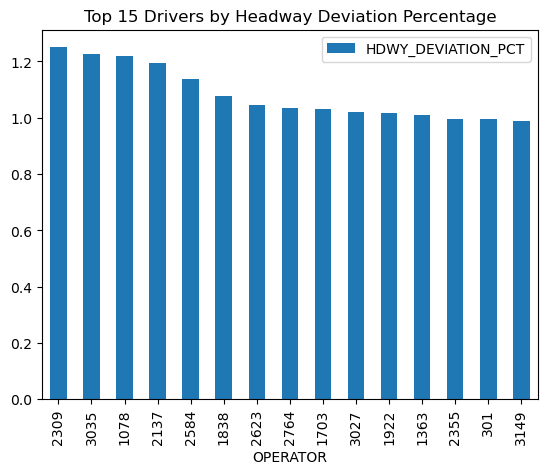

In [22]:
top15.plot(kind = 'bar', 
            x = 'OPERATOR', 
            y = 'HDWY_DEVIATION_PCT',
            title = 'Top 15 Drivers by Headway Deviation Percentage');

try to group by operator and route
run avgs on hdwy deviation
count on ON TIME & ADJ counts 
group by driver and route from above

In [23]:
#amount of times routes have been driven
routes_driven_quantity = wego['ROUTE_ABBR'].value_counts()
routes_driven_quantity = routes_driven_quantity.reset_index()
routes_driven_quantity

,ROUTE_ABBR,count
0,55,61944
1,56,60020
2,52,51819
3,3,47162
4,50,43291
5,23,42108
6,22,25959
7,7,18026


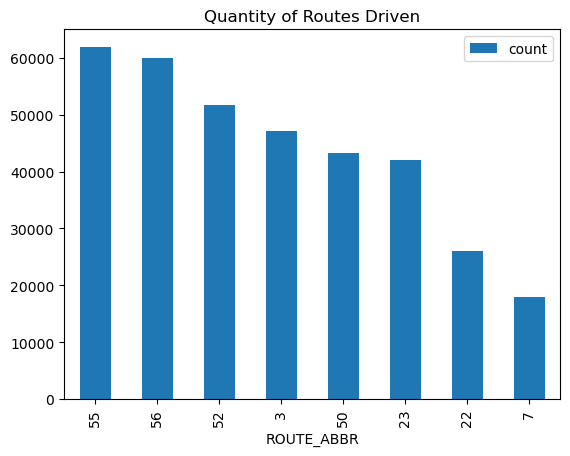

In [24]:
routes_driven_quantity.plot(kind = 'bar', 
            x = 'ROUTE_ABBR', 
            y = 'count',
            title = 'Quantity of Routes Driven');

In [25]:
driver_routes = driver.groupby('OPERATOR')['ROUTE_ABBR'].count()
driver_routes = driver_routes.reset_index()
driver_routes
#routes per driver

,OPERATOR,ROUTE_ABBR
0,0,1
1,56,3
2,235,12
3,244,25
4,301,37
...,...,...
336,3149,92
337,3156,304
338,3165,32
339,3166,35


In [26]:
drivers_with_most_routes = driver_routes.nlargest(15, 'ROUTE_ABBR')
drivers_with_most_routes

,OPERATOR,ROUTE_ABBR
190,2352,2970
52,1266,2911
39,1147,2710
38,1133,2625
202,2424,2577
174,2246,2483
8,332,2473
263,2706,2466
134,1927,2460
269,2760,2445


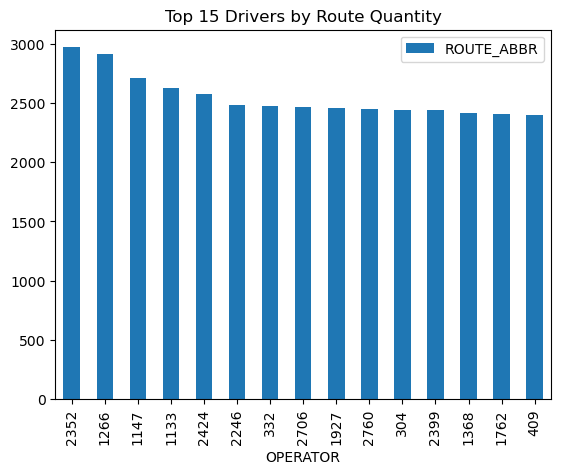

In [27]:
drivers_with_most_routes.plot(kind = 'bar', 
            x = 'OPERATOR', 
            y = 'ROUTE_ABBR',
            title = 'Top 15 Drivers by Route Quantity');

In [28]:
avg_hdwy_per_driver = driver.groupby('OPERATOR')['HDWY_DEV'].mean()
avg_hdwy_per_driver = avg_hdwy_per_driver.reset_index()
avg_hdwy_per_driver
#drivers and their avg hdwy

,OPERATOR,HDWY_DEV
0,0,NaN
1,56,-0.250000
2,235,1.918518
3,244,-0.037500
4,301,2.832222
...,...,...
336,3149,1.434226
337,3156,0.759347
338,3165,5.553472
339,3166,-2.152299


convert date time to datetime format
groupby route and operator per datetime

In [29]:
wego.info()
#checking on 'date' column for Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [30]:
#convert 'date' column from object to datetime
wego['DATE'] = pd.to_datetime(wego['DATE'])
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [31]:
driver_quantity_by_date = wego.groupby(['OPERATOR','DATE']).count()[['ROUTE_ABBR']].reset_index()
driver_quantity_by_date
#filtering for route quantity based on operator and date

,OPERATOR,DATE,ROUTE_ABBR
0,0,2023-09-07,1
1,56,2023-08-18,3
2,235,2023-08-30,12
3,244,2023-09-18,25
4,301,2023-08-29,18
...,...,...,...
7961,3156,2023-09-13,58
7962,3156,2023-09-16,66
7963,3165,2023-09-22,32
7964,3166,2023-09-29,35


In [32]:
top_fifteen_drivers_by_route_quantity = driver_quantity_by_date.nlargest(15, 'ROUTE_ABBR').reset_index()
top_fifteen_drivers_by_route_quantity
#pull top fifteen drivers by routes driven on a date

,index,OPERATOR,DATE,ROUTE_ABBR
0,5121,2427,2023-09-14,115
1,7079,2972,2023-09-25,110
2,226,357,2023-09-23,108
3,765,778,2023-09-02,108
4,4118,2127,2023-08-28,108
5,4106,2127,2023-08-07,102
6,839,907,2023-09-20,99
7,2150,1582,2023-08-23,99
8,524,559,2023-08-15,96
9,2000,1500,2023-08-08,96


In [33]:
top_fifteen_drivers_by_route_amount = top_fifteen_drivers_by_route_quantity.drop(columns = ['index'])
top_fifteen_drivers_by_route_amount
#eliminate "index" column

,OPERATOR,DATE,ROUTE_ABBR
0,2427,2023-09-14,115
1,2972,2023-09-25,110
2,357,2023-09-23,108
3,778,2023-09-02,108
4,2127,2023-08-28,108
5,2127,2023-08-07,102
6,907,2023-09-20,99
7,1582,2023-08-23,99
8,559,2023-08-15,96
9,1500,2023-08-08,96


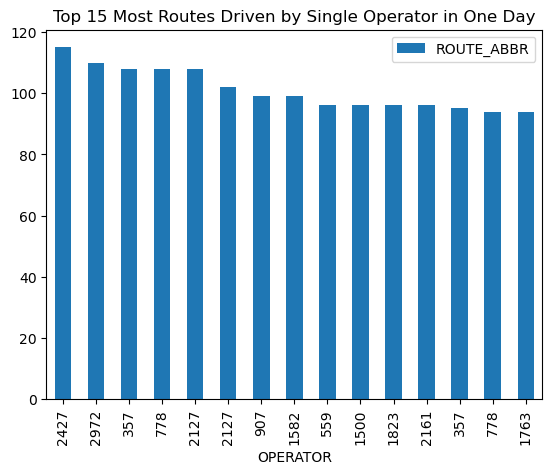

In [34]:
top_fifteen_drivers_by_route_amount.plot(kind = 'bar', 
            x = 'OPERATOR', 
            y = 'ROUTE_ABBR',
            title = 'Top 15 Most Routes Driven by Single Operator in One Day');

*Stretch Question* 8. What is the relationship between distance or time traveled since the start of a given trip and the headway deviation? Does headway become less stable the further along the route the bus has traveled?

In [ ]:
#pull associated data based on calendar id column
